In [1]:
import torch
from torch  import nn
import torchvision as tv

import numpy as np

import time
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1. Скачайте тренировочную и тестовою часть датасета Fashion MNIST


In [3]:
BATCH_SIZE = 256

train_dataset = tv.datasets.FashionMNIST('.', train = True, transform = tv.transforms.ToTensor(), download = True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform = tv.transforms.ToTensor(), download = True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = True)

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [4]:
labels = np.unique(train_dataset.targets.numpy())
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

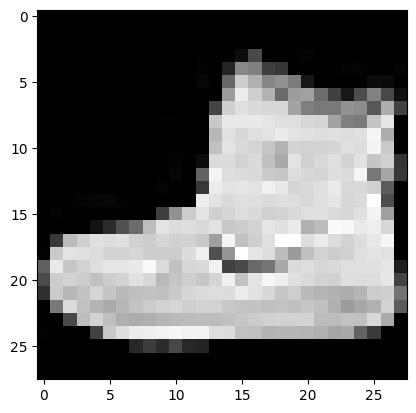

In [6]:
plt.imshow(train_dataset[0][0].numpy().reshape(28, 28), cmap='gray');

### 2. Постройте архитектуру модели, используя свёрточные слои, слои регуляризации и один финальный полносвязный слой


In [37]:
model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=3, padding=1),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Conv2d(8, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.Dropout(0.3),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Conv2d(64, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.Dropout(0.3),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Conv2d(256, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.Dropout(0.3),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Flatten(),
    nn.Linear(128, 64),
    nn.Dropout(0.3),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

In [38]:
from torchsummary import summary

summary(model, input_size=(1, 28, 28), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
         MaxPool2d-4            [-1, 8, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]           4,672
       BatchNorm2d-6           [-1, 64, 14, 14]             128
           Dropout-7           [-1, 64, 14, 14]               0
              ReLU-8           [-1, 64, 14, 14]               0
         MaxPool2d-9             [-1, 64, 7, 7]               0
           Conv2d-10            [-1, 256, 7, 7]         147,712
      BatchNorm2d-11            [-1, 256, 7, 7]             512
          Dropout-12            [-1, 256, 7, 7]               0
             ReLU-13            [-1, 256, 7, 7]               0
        MaxPool2d-14            [-1, 25

### 3. Обучите модель до необходимого качества. Если сеть не обучается до необходимого качества, попробуйте поменять архитектуру сети, варьируя параметры свёрток, количество каналов, количество свёрточных слоёв, слои регуляризации, тип оптимайзера и т. д.

In [39]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
X = X.to(device)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 8, 28, 28])
Layer BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 8, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 8, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 8, 14, 14])
Layer Conv2d(8, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 64, 14, 14])
Layer BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 64, 14, 14])
Layer Dropout(p=0.3, inplace=False). X shape: torch.Size([1, 64, 14, 14])
Layer ReLU(). X shape: torch.Size([1, 64, 14, 14])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 64, 7, 7])
Layer Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 256

In [40]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
X = X.to(device)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [41]:
def evaluate_accuracy(data_loader, model, device):
    
    test_acc, n = torch.Tensor([0]).to(device), 0
    
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        test_acc += (model(X).argmax(dim=1) == y).sum()
        n += y.shape[0]
    return test_acc.item() / n

In [42]:
def trainer(model, train_loader, test_loader, optimizer, epochs, device):
    
    loss = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        train_loss, train_acc = 0.0, 0.0
        start, n = time.time(), 0
        
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            optimizer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(test_iter, model, device)

        print(f'epoch: {epoch + 1}, time: {time.time()-start:.1f} sec, train_loss: {train_loss / n:.5f}, ' \
        f'train_acc: {train_acc / n:.5f}, ||| test_acc: {test_acc:.5f} |||')


In [43]:
learnin_rate = 0.01
epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=learnin_rate)

trainer(model, train_iter, test_iter, optimizer, epochs, device)

epoch: 1, time: 8.2 sec, train_loss: 0.00241, train_acc: 0.77422, ||| test_acc: 0.84310 |||
epoch: 2, time: 8.9 sec, train_loss: 0.00147, train_acc: 0.86723, ||| test_acc: 0.87380 |||
epoch: 3, time: 9.0 sec, train_loss: 0.00127, train_acc: 0.88470, ||| test_acc: 0.87810 |||
epoch: 4, time: 9.0 sec, train_loss: 0.00116, train_acc: 0.89508, ||| test_acc: 0.88710 |||
epoch: 5, time: 9.0 sec, train_loss: 0.00107, train_acc: 0.90480, ||| test_acc: 0.90130 |||
epoch: 6, time: 9.0 sec, train_loss: 0.00102, train_acc: 0.90762, ||| test_acc: 0.89240 |||
epoch: 7, time: 9.0 sec, train_loss: 0.00099, train_acc: 0.91137, ||| test_acc: 0.89170 |||
epoch: 8, time: 9.0 sec, train_loss: 0.00095, train_acc: 0.91480, ||| test_acc: 0.90100 |||
epoch: 9, time: 9.0 sec, train_loss: 0.00091, train_acc: 0.91825, ||| test_acc: 0.90310 |||
epoch: 10, time: 9.0 sec, train_loss: 0.00087, train_acc: 0.91907, ||| test_acc: 0.90460 |||
